# Alumna: Hernández Sandoval Kelly Pamela

## Ejercicio 4:

Aproximar la solución del problema

$$\frac{dy}{dt}=y-t^{2},     en 0<t<4$$

$$y(0)=0.5$$

Siendo $y(0)$ la condición inicial

Donde  $h_t= 1, 0.5, 0.25, 0.0125$, ($N_t=4, 8, 16, 32$). En todos los casod, usando:

1) método Euler

2) método Runge-Kutta de orden 2

3) método Runge-Kutta de orden 3

4) método de Runge-Kutta de orden 4

La solución exacta es.

$$y(t)=(t+1)^2-0.5e^{t}$$

a) Grafique la solución exacta y compárela con las soluciones numéricas obtenidas con cada método

b) Grafique el error y explique el comportamiento de cada método

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mesh(a, b, Nt ):
    """
    Función que calcula ht, el tamaño del paso de tiempo

    Parameters
    ----------
    a : inicio del dominio
    b : fin del dominio
    Nt : pasos de tiempo

    Returns
    -------
    ht : Tamaño del paso de tiempo

    """    
    ht = (b-a)/ Nt
    return ht

def f(t,y):
    """
    Se establece f(t,y), la cual busca aproximar la solución y(t)
    Parameters
    ----------
    t : tiempo
    y : variable dependiente

    Returns
    -------
    devuelve la función f(t,y)

    """
    return y - t **2 + 1

def Exacta(t):
    """
    

    Parameters
    ----------
    t : TYPE
        DESCRIPTION.

    Returns
    -------
    TYPE
        DESCRIPTION.

    """
    return (t + 1)**2 - 0.5 * np.exp(t)

def Euler(f, t, w, ht ):
    """  
    Función que realiza aproximación a PVI mediante Euler
    Parameters
    ----------
    f : función que aproxima la solución y(t)
    t : tiempo, depende de ht
    w : aproximacion mediante Euler
    ht : tamaño del paso de tiempo
    Returns
    -------
    None.

    """
    for i, val in enumerate (w[0:-1]):
        w[i +1] = w[i] + ht * f(t[i], w[i])
        t[i +1] = t[0] + (i +1) * ht
    
def RK2(f, t, w, ht):
    """
    Función que realiza aproximación a PVI mediante RK2
    
    Parameters
    ----------
    f : función que aproxima la solución y(t)
    t : tiempo, depende de ht
    w : aproximacion del método RK2 (punto medio), orden 2
    ht : tamaño del paso de tiempo
    Solo un k1

    Returns
    -------
    None.

    """
    for i, val in enumerate (w[0: -1]):
        k1 = ht * f(t[i], w[i])
        w[i +1] = w[i] + ht * f(t[i] + ht * 0.5 ,w[i] + k1 * 0.5)
        t[i +1] = a + (i +1) * ht
        
def RK3(f, t, w, ht ):
    """
    
    Función que realiza aproximación a PVI mediante RK3

    Parameters
    ----------
    f : función que aproxima la solución y(t)
    t : tiempo, depende de ht
    w : aproximacion del método RK3 (HEUN), orden 3
    ht : tamaño del paso de tiempo
    Tenemos k1, k2, k3
    Returns
    -------
    None.

    """
    for i, val in enumerate (w [0:-1]):
        k1 = ht * f(t[i], w[i])
        k2 = ht * f(t[i] + ht /3,w[i] + k1 / 3)
        k3 = ht * f(t[i] + 2 * ht / 3, w[i] + 2 * k2 / 3)
        w[i +1] = w[i] + (k1 + 3 * k3) / 4
        t[i +1] = a + (i +1) * ht
def RK4(f, t, w, ht ):
    """
    
    Función que realiza aproximación a PVI mediante RK4

    Parameters
    ----------
    f : función que aproxima la solución y(t)
    t : tiempo, depende de ht
    w : aproximacion del método RK4, orden 4
    ht : tamaño del paso de tiempo
    Tenemos k1, k2, k3, k4
    Returns
    -------
    None.

    """
    for i, val in enumerate (w [0:-1]):
        k1 = ht * f(t[i], w[i])
        k2 = ht * f(t[i] + ht /2, w[i] + k1 / 2)
        k3 = ht * f(t[i] + ht /2, w[i] + k2 / 2)
        k4 = ht * f(t[i] + ht , w[i] + k3)
        w[i +1] = w[i] + (k1 + 2* k2 + 2* k3 + k4) / 6
        t[i +1] = a + (i +1) * ht
        
        


In [17]:
# Se define una función que contiene el llamado a las demás funciones que al determinar Nt y 
# y las gráficas
def parametros(Nt,ht):
    #Dominio para la aproximación
    t = np.linspace(a, b, Nt +1)
    #dominio para la solución exacta, con un muestreo de 100
    t_= np.linspace(a, b, 100)

    #se calcula la solución exacta para cada caso
    yp_= Exacta(t_)
    yp= Exacta(t)

    #se definen arreglos de tamaño Nt+1
    y_eul = np.zeros(Nt +1)
    y_rk2 = np.zeros(Nt +1)
    y_rk3 = np.zeros(Nt +1)
    y_rk4 = np.zeros(Nt +1)

    #se determina la ubicación en el arreglo para la conddición inicial

    y_eul[0]= y0
    y_rk2[0]= y0
    y_rk3[0]= y0
    y_rk4[0]= y0
    
    #se mandan a llamar las funcioens para cada aproximación con cada método
    Euler(f, t, y_eul , ht)
    RK2(f, t, y_rk2 , ht)
    RK3(f, t, y_rk3 , ht)
    RK4(f, t, y_rk4 , ht)

    #se calcula el error con la diferencia de la aproximación y la solución analítica
    e_eul = np.abs(yp - y_eul )
    e_rk2 = np.abs(yp - y_rk2 )
    e_rk3 = np.abs(yp - y_rk3 )
    e_rk4 = np.abs(yp - y_rk4 )

    #se normaliza el error correspondiente a cada método
    n_error_eul = np.linalg.norm(e_eul , 2)
    n_error_rk2 = np.linalg.norm(e_rk2 , 2)
    n_error_rk3 = np.linalg.norm(e_rk3 , 2)
    n_error_rk4 = np.linalg.norm(e_rk4 , 2)
    
    
    #se define la gráfica de la solución y las aproximaciones para cada Nt
    plt.figure(figsize=(15,10))
    plt.plot(t_,yp_,'gray', label='Exacta',linewidth=4)
    plt.plot(t,y_eul,'--v', label='Euler',linewidth=1,markersize=10)
    plt.plot(t,y_rk2,'--^', label='Rk2',linewidth=1,markersize=10)
    plt.plot(t,y_rk3,'--o', label='Rk3',linewidth=1,markersize=10)
    plt.plot(t,y_rk4,'--s', label='Rk4',linewidth=1,markersize=10)
    plt.grid()
    plt.suptitle('Solución y aproximación Nt={}'.format(Nt),fontsize=18)
    plt.title('E Eul:{:5f}, E RK2: {:5f}, E RK3: {:5f}, E RK4: {:5f}'.format(n_error_eul,n_error_rk2,n_error_rk3,n_error_rk4),color='b')

    plt.legend()
    plt.xlabel('$t$')
    plt.ylabel('$y(t)$')
    #se define la gráfica de los errores para las diferentes aproximaciones

    plt.figure(figsize=(15,10))
    plt.plot(e_eul[1:],'-o', label='Euler',linewidth=2,markersize=10)
    plt.plot(e_rk2[1:],'-o', label='Rk2',linewidth=2,markersize=10)
    plt.plot(e_rk3[1:],'-o', label='Rk3',linewidth=2,markersize=10)
    plt.plot(e_rk4[1:],'-o', label='Rk4',linewidth=2,markersize=10)
    plt.grid()
    plt.suptitle('Errores Nt={}'.format(Nt),fontsize=18)
    plt.title('E Eul:{:5f}, E RK2: {:5f}, E RK3: {:5f}, E RK4: {:5f}'.format(n_error_eul,n_error_rk2,n_error_rk3,n_error_rk4),color='b')

    plt.semilogy()
    plt.legend()
    plt.xlabel('$t$')
    plt.ylabel('$y(t)$')


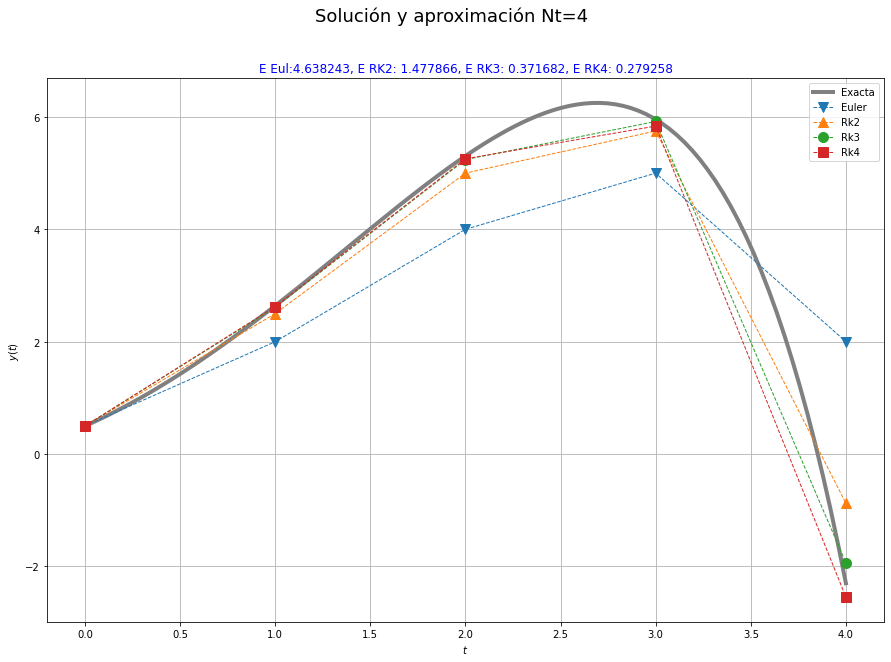

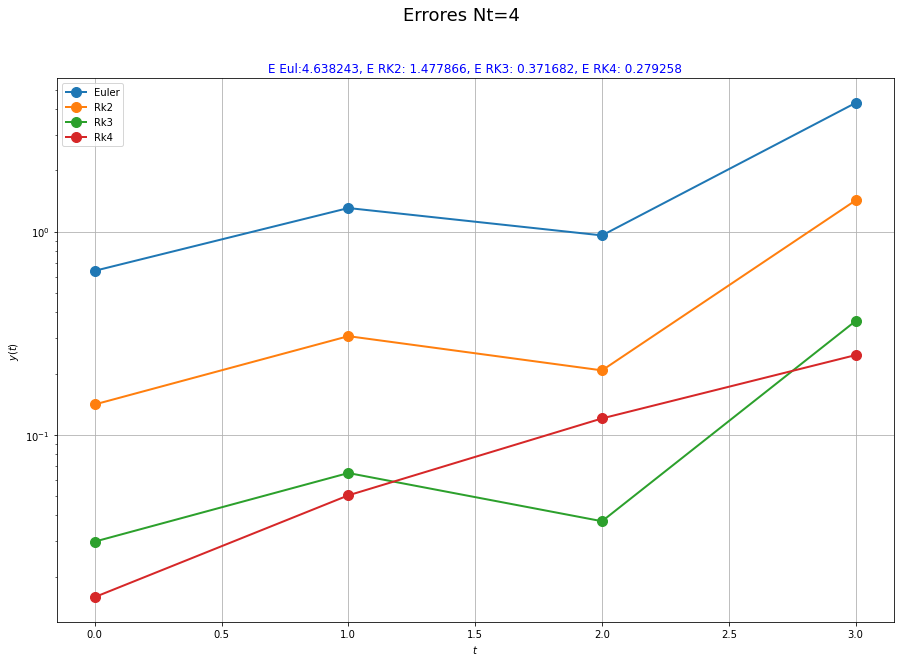

In [18]:
Nt = 4 # 4, 8, 16, 32
a = 0
b = 4
ht = mesh(a, b, Nt)
y0 = 0.5

parametros(Nt,ht)

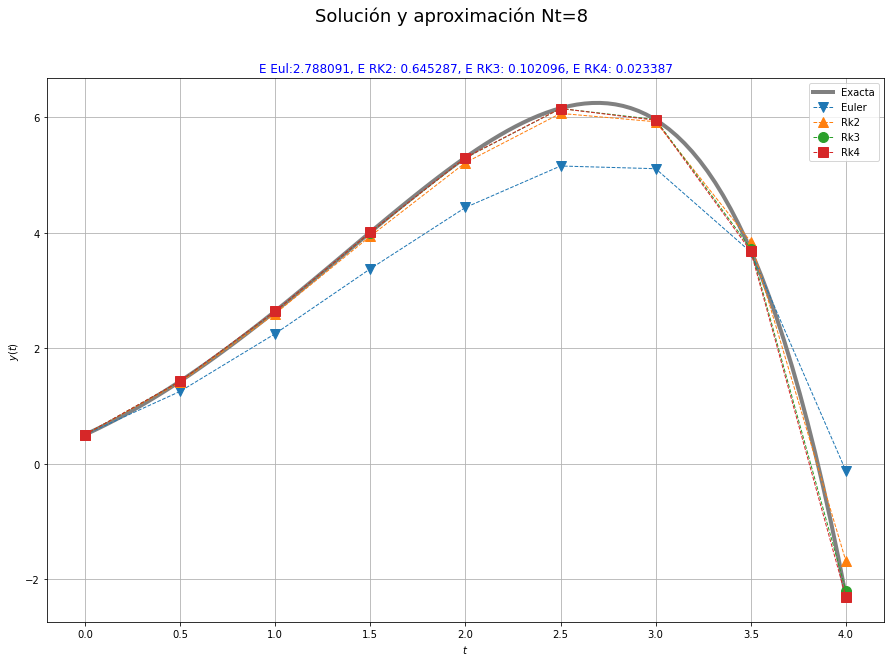

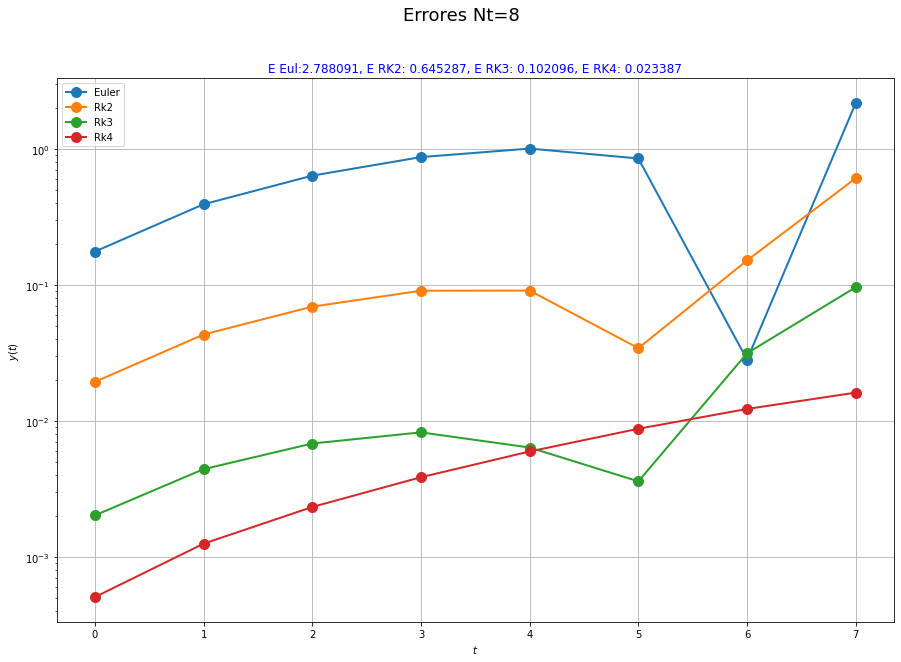

In [19]:
Nt = 8 # 4, 8, 16, 32
a = 0
b = 4
ht = mesh(a, b, Nt)
y0 = 0.5

parametros(Nt,ht)

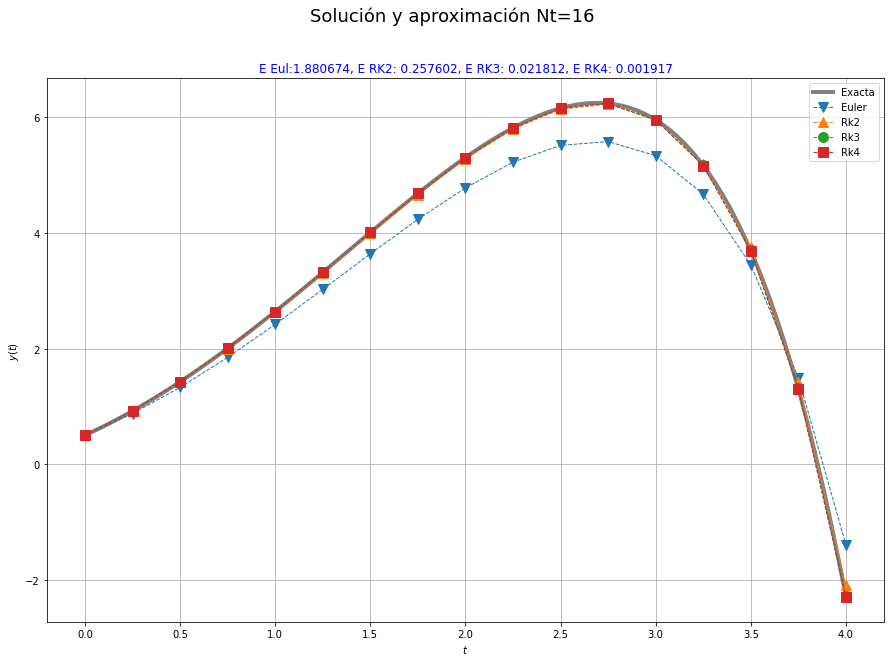

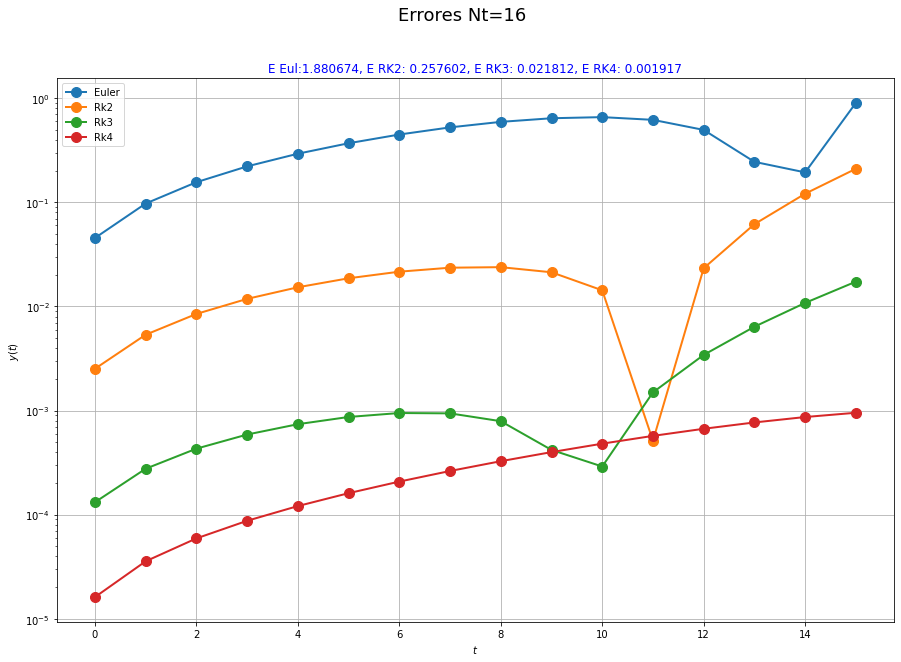

In [20]:
Nt = 16 # 4, 8, 16, 32
a = 0
b = 4
ht = mesh(a, b, Nt)
y0 = 0.5

parametros(Nt,ht)

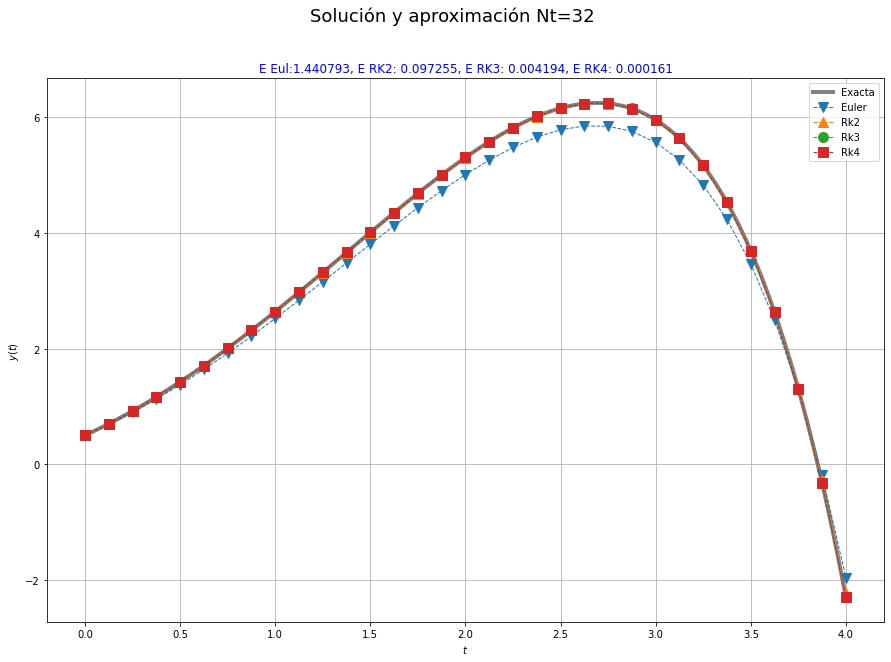

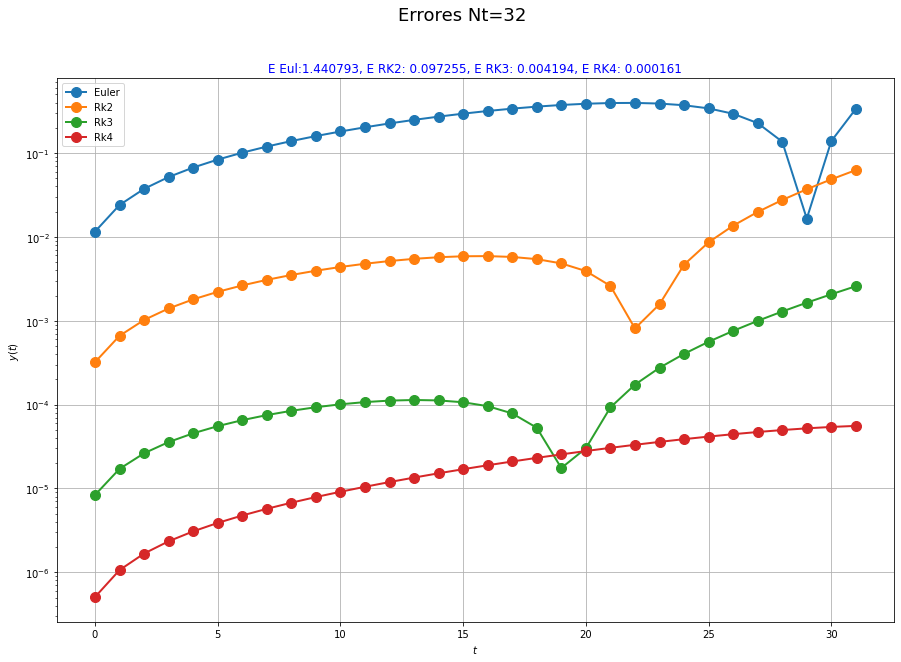

In [21]:
Nt = 32 # 4, 8, 16, 32
a = 0
b = 4
ht = mesh(a, b, Nt)
y0 = 0.5

parametros(Nt,ht)

## Análisis de los resultados

En todos los casos que se han graficado, se observa que el método Runge-Kutta es el de mejor aproximación, a comparación del método de Euler. El método con de RK4, en el error parece tener un comportamiento estable, a diferencia de los otros de orden menor, además de que este mismo tiene errores aun mas pequeños que los otros.

Respecto a la gráffica de la solución exacta y las soluciones numéricas, el método de Euler tarda más en aproximarse a esta, mientras que los métodos de Runge Kutta se acercan mucho mejor. Además, se observa que mientras más pasos de tiempo tengamos, se tendrá una mejor aproximación a la solución, por esto, el error también disminuirá considerablemente.
